In [1]:
#load the libraries we have been using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #Library for visualization
from sklearn import datasets
iris = datasets.load_iris()
X_w = iris.data[:, :2]  #load the first two features of the iris data
y_w = iris.target         #load the target of the iris data


In [2]:
X = X_w[y_w < 2]
y = y_w[y_w < 2]

In [3]:
X_0 = X[y == 0]
X_1 = X[y == 1]

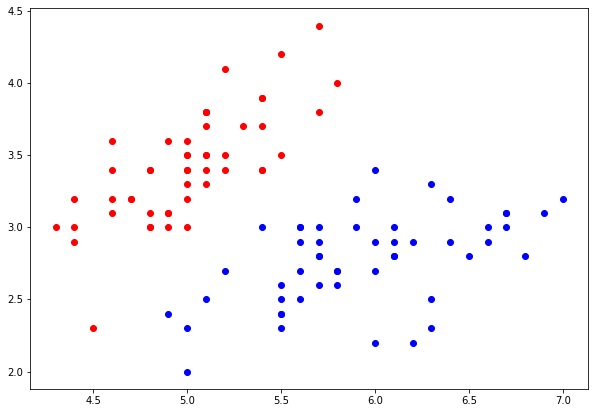

In [4]:
#to visualize within IPython:
%matplotlib inline
plt.figure(figsize=(10,7)) #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')

In [5]:
#Split the dataset of the first two features of the first two classes. Stratify the target set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=7,stratify=y)

In [6]:
#Create an SVM model instance. Set the kernel to be linear, as we want a line to separate the two classes that are involved in this example:
from sklearn.svm import SVC
svm_inst = SVC(kernel='linear')

In [7]:
#Fit the model (train the model):
svm_inst.fit(X_train,y_train)

SVC(kernel='linear')

In [8]:
#Predict using the test set:
y_pred = svm_inst.predict(X_test)


In [9]:
#Measure the performance of the SVM on the test set:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [12]:
#Visualize the decision boundary, the line separating the classes, by using the estimator on a two-dimensional grid:
from itertools import product
#Minima and maxima of both features
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])
#Grid/Cartesian product with itertools.product
test_points = np.array([[xx, yy] for xx, yy in
product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])
#Predictions on the grid
test_preds = svm_inst.predict(test_points)

In [13]:
X_0 = X[y == 0]
X_1 = X[y == 1]


Text(0.5, 1.0, 'Linearly-separated classes')

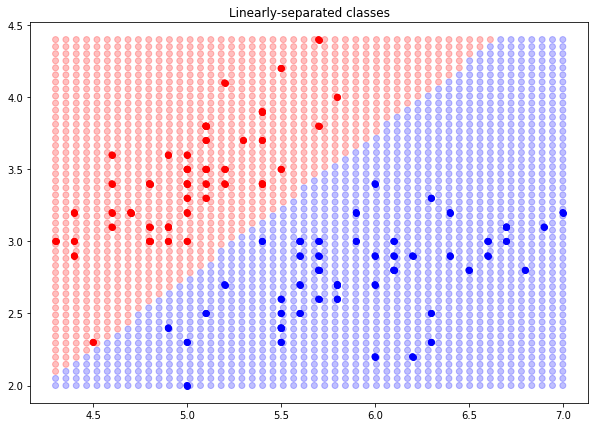

In [14]:
 %matplotlib inline
plt.figure(figsize=(10,7))   #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')
colors = np.array(['r', 'b'])
plt.scatter(test_points[:, 0], test_points[:, 1],
color=colors[test_preds], alpha=0.25)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])
plt.title("Linearly-separated classes")